# ECSS: Entity Component System in Scenegraph <a class="anchor" id='top'></a>

### *Copyright 2021-2022 Dr. George Papagiannakis,  papagian@csd.uoc.gr & Dr. Manos Kamarianakis, manos.kamarianakis@oramavr.com*
*All Rights Reserved*
### *University of Crete & Foundation for Research & Technology - Hellas (FORTH)*

1. [Introduction](#introduction)
    1. [What is ECS? ](#ecs)
    2. [Entities](#Entities)
    3. [Components](#Components)
    4. [Systems](#Systems)
2. [The pyglGA project](#The_pyglGA_project)
    1. [Installation](#Installation)
    2. [Setting up a simple project](#Setting_up)
3. [Matrices and Numpy](#Matrices)
    1. [Column vector notation](#Column_vector_notation)
    2. [Efficient matrix multiplications](#Efficient)

## 1 Introduction & Notation <a class="anchor" id='introduction'></a>

### 1.1 What is ECS? <a class="anchor" id='ecs'></a>
[Top](#top)

Entity Component System (ECS) is the core of the Unity Data-Oriented Tech Stack. As the name indicates, ECS has three principal parts:

* __Entities__ — the entities, or things, that populate your game or program.
* __Components__ — the data associated with your entities, but organized by the data itself rather than by entity. (This difference in organization is one of the key differences between an object-oriented and a data-oriented design.)
* __Systems__ — the logic that transforms the component data from its current state to its next state— for example, a system might update the positions of all moving entities by their velocity times the time interval since the previous frame.

<!-- ![ECS_basics.png](attachment:ECS_basics.png) -->

![WhatIsECS-ECS.png](./Files_for_notebooks/WhatIsECS-ECS.png)
[Source](https://docs.unity3d.com/Packages/com.unity.entities@0.17/manual/index.html#)

### 1.2 Entities <a class="anchor" id='Entities'></a>
[Top](#top)

They represent the individual "things" in your game or application. An entity has neither behavior nor data; instead, it identifies which pieces of data belong together. Systems provide the behavior, and components store the data.

![WhatIsECS-Entities.png](./Files_for_notebooks/WhatIsECS-Entities.png)

### 1.3 Components <a class="anchor" id='Components'></a>
[Top](#top)

They represent the data of your game or application. Entities are identifiers that index your collections of components, while Systems provide the behavior. 

![WhatIsECS-Components.png](./Files_for_notebooks/WhatIsECS-Components.png)

### 1.4 Systems <a class="anchor" id='Systems'></a>
[Top](#top)

They provide the logic that transforms the component data from its current state to its next state. For example, a system might update the positions of all moving entities by their velocity multiplied by the time interval since the previous update.

![WhatIsECS-Systems.png](./Files_for_notebooks/WhatIsECS-Systems.png)

### 1.5 Example of a scenegraph using ECS in Computer Graphics <a class="anchor" id='scenegraph_example'></a>
[Top](#top)

![scenegraph_example.png](./Files_for_notebooks/scenegraph_example.png)

In the example above, Entities are represented in green and Components are represented in blue. The TRS Component is present in all Entities concerning a scenegraph for CG. This scenegraph is then traversed in every frame by the Systems. 

### 1.6 Why use ECS in Computer Graphics?<a class="anchor" id='Why_use_ECS'></a>
[Top](#top)

ECS allows faster workflows and optimized performance for games, as data objects are stored and processed optimally for GPUs.

![comparison.png](./Files_for_notebooks/comparison.png)

![ECS-2.png](./Files_for_notebooks/ECS-2.png)
[Source](https://www.raywenderlich.com/7630142-entity-component-system-for-unity-getting-started)

## 2 The pyECSS project <a class="anchor" id='The_pyglGA_project'></a>

### 2.1 Installation <a class="anchor" id='Installation'></a>
[Top](#top)

To install the pyglGA project you need to 
1. Download the project, as well as [VSCode](https://code.visualstudio.com/Download). 
2. Install [Anaconda](https://www.anaconda.com/) (or its smaller sister [Miniconda](https://docs.conda.io/en/latest/miniconda.html)). You should then be able to go  create the `glGA39` environment by going to the `setup` folder (containing the `glGA39.yml` file) in terminal and typing `conda env create -f gate.yml`.
2. In terminal, inside the `Packages` folder, run `python -m pip install -e .` to locally install pyglGA.
2. Open the folder *Packages* via VSCode. 
3. Make sure you select the python interpreter `Python 3.9.x 64-bit ('glGA39':conda)` (via View > Command Palette > Python: Select Interpreter).
4. Via Command Palette, select *Python: Configure Tests* and select **unittest** (as the framework), **pyglGA** (as the directory) and __test_*.py__* If done correctly, you should see the testing submenu on the left and if you click it and then refresh the tests you will see the following image. 
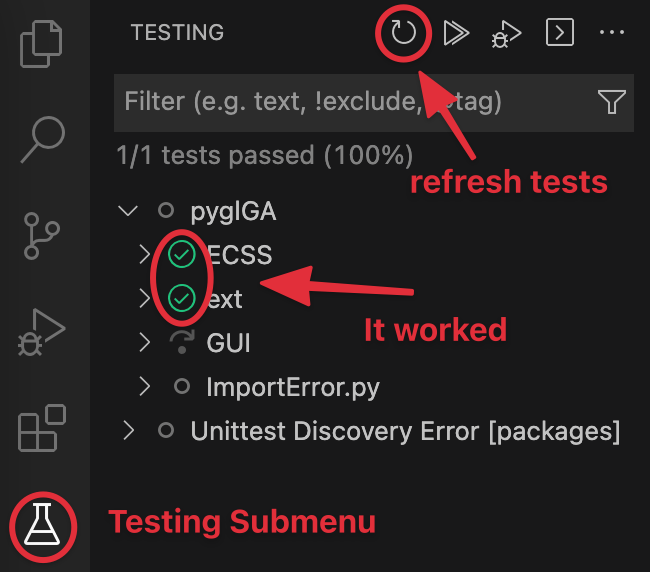


### 2.2 Setting up a simple project <a class="anchor" id='Setting_up'></a>
[Top](#top)

One can use the sample project _basicCubeGuiECSS_ in the _scripts_ folder. Simply right click and select _Run Python File in Terminal_.

Of course, you may choose to tamper with any of the test files, found in the _tests_ subfolders inside _ECSS_ or _ext_ folders, and then run them via the testing submenu on the left.

## 3 Matrices and Numpy<a class="anchor" id='Matrices'></a>

### 3.1 Column vector notation<a class="anchor" id='Column_vector_notation'></a>
[Top](#top)

In Computer Graphics, we usually use vectors to represent points and matrices to represent transformations such as translations, rotations and dilations. Usually a point $p$ with coordinates $(x,y,z)$ is represented as the vector $v=[x,y,z]\in\mathbb{R}^3$. Note that, if seen as a matrix, $v$'s dimension are 1x3. People usually mistake $v=[x,y,z]$ with $v^T=\begin{bmatrix}x \\ y \\z \end{bmatrix}$ which is a 3x1 matrix. 

In any case, one should choose to represent all points as either a __column__ or a __row__, where the latter is the most common practice and the one we use in this framework. Using the column notation, let us assume that we have a point in its column form $v$. If $T$,$R$ and $S$ represent a translation, rotation and dilation matrix respectively, we can apply them (in reverse order, i.e., dilation first) to our point by evaluating the final point in its column form $f$, where
$$ f = T\cdot R \cdot S \cdot v.$$
Notice that if we want to use the row notation, we should take the transpose of the above quantity, i.e., evaluate the row form $f^T$ of our point's row $v^T$ by evaluating
$$ f^T = \left(T\cdot R \cdot S \cdot v\right)^T= v^T\cdot S^T \cdot R^T \cdot T^T.$$ 

Did you notice what happened? Due to the well know identity $(AB)^T=B^TA^T$, the order of the matrices $T$,$R$,$S$ and $v$ was reversed in the row notation! 

__Caution:__ In a row-major notation project, you should use the appropriate order of multiplication as people usually forget it and get wrong results (without any error warning), by mistaking $v^T\cdot S^T \cdot R^T \cdot T^T$ with $ S^T \cdot R^T \cdot T^T\cdot v$ or $ T^T \cdot R^T \cdot S^T\cdot v$.

### 3.2 Efficient matrix multiplications <a class="anchor" id='Efficient'></a>
[Top](#top)

The quantity $T\cdot R \cdot S \cdot v$ can be seen as $ T\cdot (R \cdot (S \cdot v))$, i.e., we first apply the dilation to our initial point, then the rotation to the outcome point and finally the translation. Note that this is actually the most efficient way (in terms of how many operations -additions and multiplications- are required) to evaluate this matrix product. This conclusion derives from the fact that multiplying a $k$x$m$ and a $m$x$n$ matrix requires $kmn$ multiplications and $k(m-1)n$ additions.
* Evaluting $ T\cdot (R \cdot (S \cdot v))$ would require $3\cdot3\cdot1+3\cdot3\cdot1+3\cdot3\cdot1=27$ multiplications and $3\cdot2\cdot1+3\cdot2\cdot1+3\cdot2\cdot1=18$ additions.
* Evaluting $ ((T\cdot R) \cdot S) \cdot v$ would require $3\cdot3\cdot3+3\cdot3\cdot3+3\cdot3\cdot1=63$ multiplications and $3\cdot2\cdot3+3\cdot2\cdot3+3\cdot2\cdot1=42$ additions.

Similarly, in row-major notation, one should evaluate $((v^T\cdot S^T) \cdot R^T) \cdot T^T$ to be efficient. 

Of course, the order proposed here only holds if we need to evaluate the final location of a single point. If one need to evaluate the final location of multiple points for the **same** translation, rotation and dilation then it is wise to first evaluate $M:=T\cdot R \cdot S$ for column-major notation (resp. $M':=S^T \cdot R^T \cdot T^T$ for row-major), and then evaluate $M \cdot v$ (resp. $v^T\cdot M'$) for all points $v$.
